In [1]:
# 生成假数据
import pandas as pd

data = pd.read_excel('./testAttach/工作簿1.xlsx')
data

,月份,平均数量,最大值,最小值,可能最大值,可能最小值
0,1,789,833.859470,765.944538,926.126592,582.400275
1,2,585,658.036980,581.247859,793.237552,580.522980
2,3,501,600.625643,435.062560,765.503758,274.203431
3,4,674,749.541058,605.126020,792.665051,416.194460
4,5,654,670.982823,616.248811,816.211648,476.225583
5,6,754,763.039071,690.260641,955.306925,495.109486
6,7,592,646.104168,582.696873,821.071025,384.111028
7,8,682,732.602932,608.460071,910.050978,443.287935
8,9,508,545.585781,495.161548,591.382856,365.201079
9,10,629,693.043951,535.108437,794.772910,383.939557


In [18]:
# 数据处理
import numpy as np

data['月份']

array([0, 1, 2, 3, 4, 5, 6, 7])

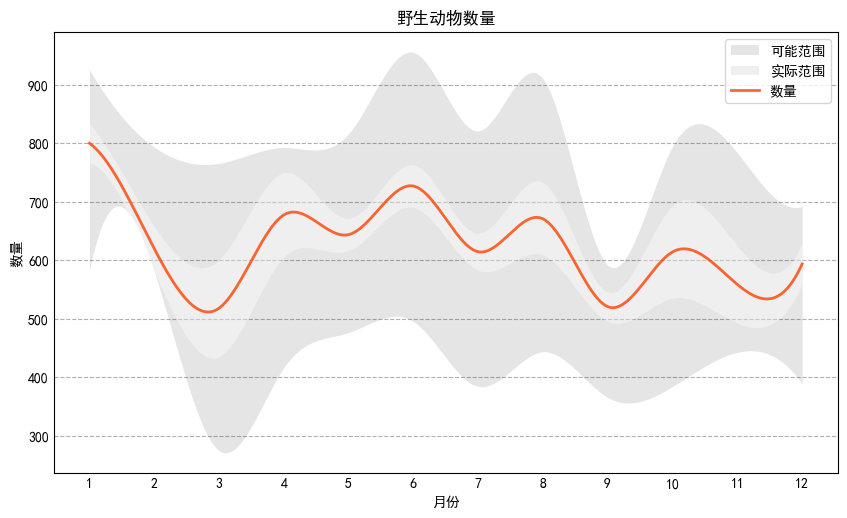

In [169]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'

import numpy as np
import pandas as pd


def smooth_xy(x_value: np.ndarray, y_value: np.ndarray):
    from scipy.interpolate import make_interp_spline
    model = make_interp_spline(x_value, y_value)
    x_smooth = np.linspace(x_value.min(), x_value.max(), 500)
    y_smooth = model(x_smooth)
    return x_smooth, y_smooth


x = data['月份']
y = (data['最大值'] + data['最小值']) / 2
yMax = data['最大值']
yMin = data['最小值']
yMaxMaybe = data['可能最大值']
yMinMaybe = data['可能最小值']

# 平滑处理
_, yMax = smooth_xy(x, yMax)
_, yMin = smooth_xy(x, yMin)
_, yMaxMaybe = smooth_xy(x, yMaxMaybe)
_, yMinMaybe = smooth_xy(x, yMinMaybe)
x, y = smooth_xy(x, y)

# plot
fig, ax = plt.subplots(figsize=(8, 4.5))

# 画图--------------------
# 可能范围
ax.fill_between(x, yMaxMaybe, yMinMaybe, alpha=.1, linewidth=0, label='可能范围', color='black')
# 实际范围
ax.fill_between(x, yMax, yMin, alpha=.4, linewidth=0, label='实际范围', color='white')
ax.plot(x, y, linewidth=2, alpha=.8, label='数量', color='#fc4100')
# 画图结束----------------------

ax.set(xlabel='月份', ylabel='数量', title='野生动物数量',
       xticks=data['月份'])
ax.legend()
legs = ax.get_legend()
legs.legend_handles[1].set_color('#efefef')
ax.grid(axis='y', linestyle='--')
ax.grid(axis='x', linestyle='')

plt.show()

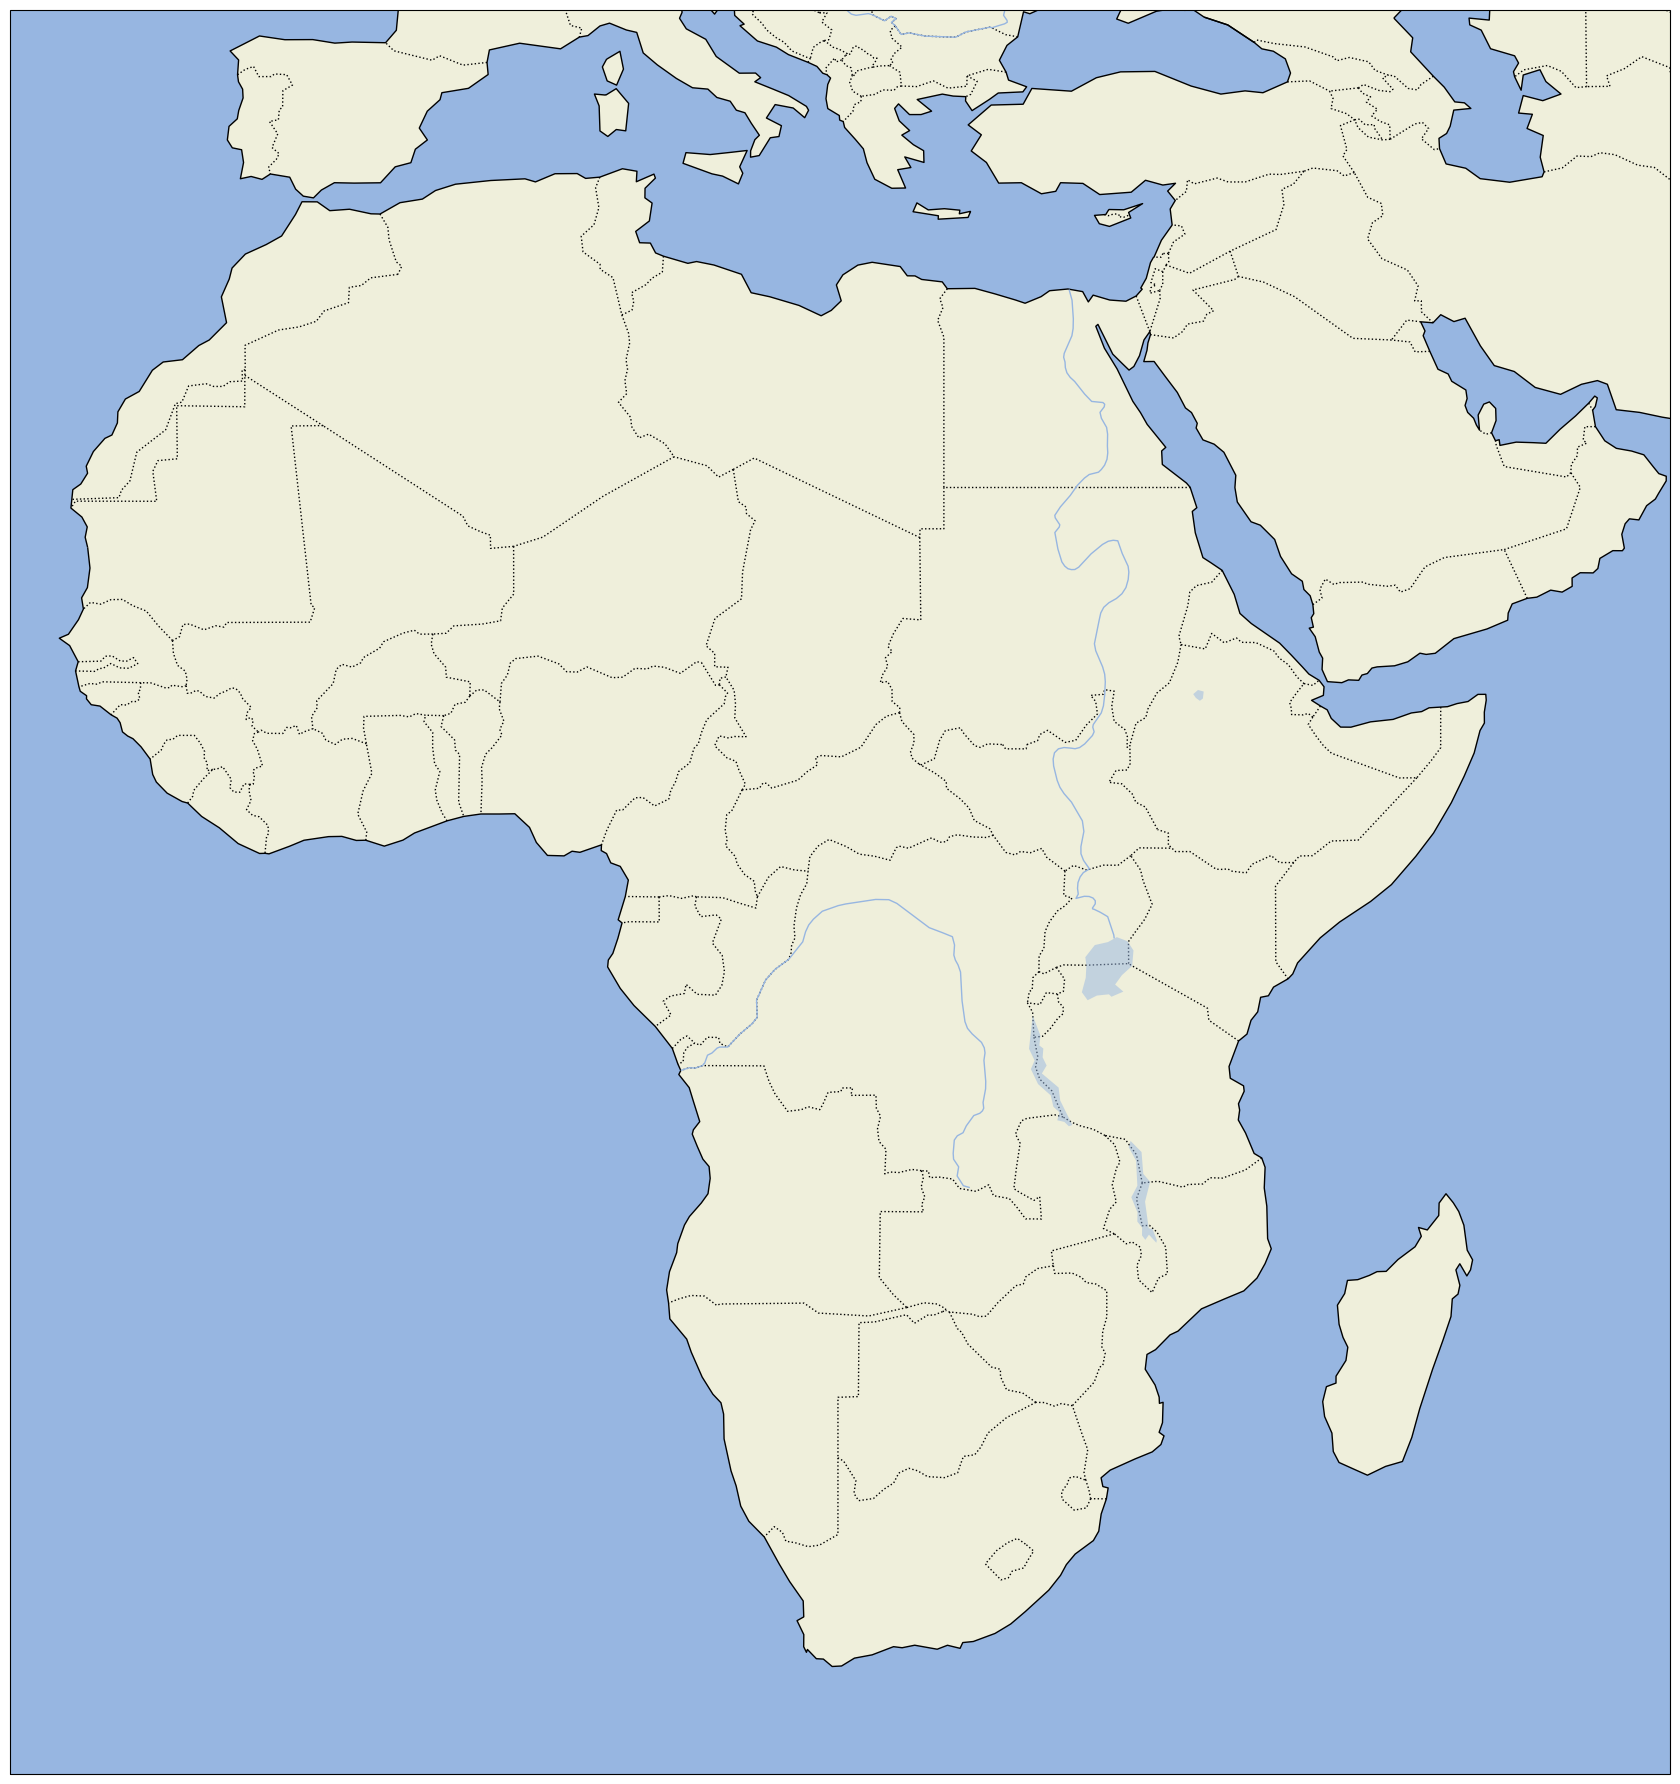

In [223]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(32, 18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.savefig('./africa.png')
plt.show()
